In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec

NUMERO_GRUPOS = 5

np.random.seed(327)

df = pd.read_csv('data/consolidadoOWID.csv', sep = ',')
df.head()
df.dropna(subset=['MORTES_POR_MILHAO', 'CASOS_POR_MILHAO'], inplace=True)
df['LETALIDADE'] = (df.MORTES_POR_MILHAO / df.CASOS_POR_MILHAO) * 100
df.index = range(df.shape[0])

In [39]:
def linha_tendencia(x : pd.Series, y : pd.Series) :
    X = sm.add_constant(x)
    results = sm.OLS(y, X).fit()
    b = results.params[0]
    a = results.params[1]
    abscissas  = []
    ordenadas = []
    for i in range(x.size) :
        if(not np.isnan(x[i])) :
            abscissas.append(x[i])
            ordenadas.append(a * x[i] + b)
    return abscissas, ordenadas 

<AxesSubplot:title={'center':'Correlação das Mortes por Milhão x Casos por Milhão'}, xlabel='Casos por Milhão', ylabel='Mortes por Milhão'>

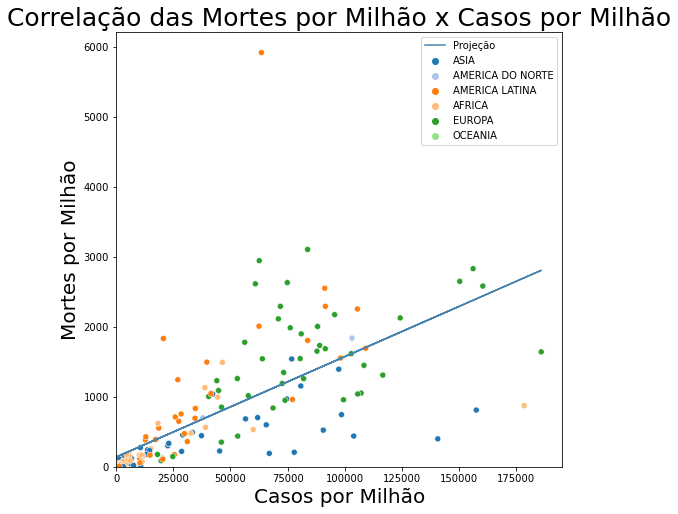

In [40]:
fig, ax0 = plt.subplots()
fig.set_size_inches(8,8)
sns.scatterplot(y='MORTES_POR_MILHAO', x='CASOS_POR_MILHAO', data=df, palette='tab20', ax=ax0, hue='CONTINENTE')
ax0.set_title('Correlação das Mortes por Milhão x Casos por Milhão', fontsize=25)
ax0.set_xlabel('Casos por Milhão', fontsize=20)
ax0.set_ylabel('Mortes por Milhão', fontsize=20)
ax0.set_xlim(0, max(df.CASOS_POR_MILHAO) * 1.05)
ax0.set_ylim(0, max(df.MORTES_POR_MILHAO) * 1.05)
_, resultados = linha_tendencia(df.CASOS_POR_MILHAO, df.MORTES_POR_MILHAO)
sns.lineplot(x = df.CASOS_POR_MILHAO, y=resultados, color='#4984af', markers=True, sort=False, label="Projeção", ax=ax0)

ax0

<AxesSubplot:title={'center':'Distribuição das Taxas de letalidades'}, xlabel='Letalidade', ylabel='Total de Países'>

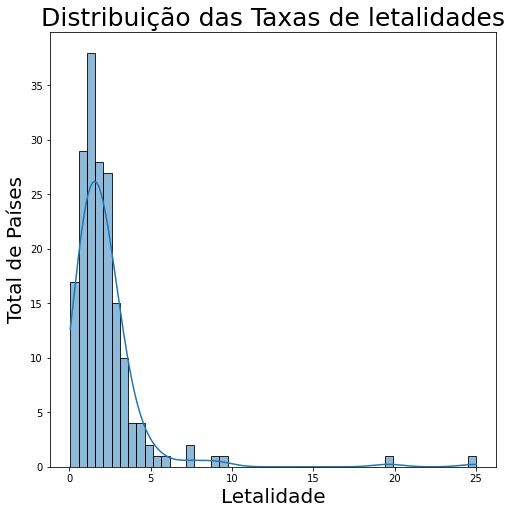

In [41]:
fig, ax0 = plt.subplots()
fig.set_size_inches(8,8)
sns.histplot(data=df, kde=True, x='LETALIDADE', ax=ax0)
ax0.set_title('Distribuição das Taxas de letalidades', fontsize=25)
ax0.set_xlabel('Letalidade', fontsize=20)
ax0.set_ylabel('Total de Países', fontsize=20)

ax0

In [42]:
df[['PAIS', 'LETALIDADE', 'CASOS_POR_MILHAO', 'MORTES_POR_MILHAO']].sort_values(by='LETALIDADE').tail()

,PAIS,LETALIDADE,CASOS_POR_MILHAO,MORTES_POR_MILHAO
33,SUDAN,7.474848,846.947,63.308
9,MEXICO,8.874984,20665.377,1834.049
42,PERU,9.321944,63522.224,5921.506
47,YEMEN,19.607785,234.259,45.933
169,VANUATU,25.001920,13.023,3.256


In [43]:
df[['PAIS', 'LETALIDADE', 'CASOS_POR_MILHAO', 'MORTES_POR_MILHAO']].sort_values(by='LETALIDADE').head()

,PAIS,LETALIDADE,CASOS_POR_MILHAO,MORTES_POR_MILHAO
109,SINGAPORE,0.056917,10810.477,6.153
158,BHUTAN,0.082407,3145.363,2.592
75,BURUNDI,0.135774,495.678,0.673
101,LAOS,0.141195,486.561,0.687
150,TIMOR-LESTE,0.256356,7692.413,19.720


In [44]:
dfClass = df[['PAIS', 'CONTINENTE', 'SUB_REGIAO', 'CASOS_POR_MILHAO', 'MORTES_POR_MILHAO']]
dfClass.index = range(dfClass.shape[0])

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
casos_escalados = scaler.fit_transform(X=dfClass[['CASOS_POR_MILHAO','MORTES_POR_MILHAO']])

modelo = KMeans(n_clusters=NUMERO_GRUPOS)

modelo.fit(casos_escalados)

clusters = scaler.inverse_transform(modelo.cluster_centers_)

dfClass.loc[:,'GRUPO']=pd.Series(modelo.labels_)
dfClass

C:\Desenvolvedor\Py\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Desenvolvedor\Py\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,PAIS,CONTINENTE,SUB_REGIAO,CASOS_POR_MILHAO,MORTES_POR_MILHAO,GRUPO
0,CHINA,ASIA,EASTERN ASIA,64.195,3.221,0
1,INDIA,ASIA,SOUTHERN ASIA,22590.017,300.348,0
2,UNITED STATES,AMERICA DO NORTE,NORTHERN AMERICA,103117.215,1840.094,1
3,INDONESIA,ASIA,SOUTH-EASTERN ASIA,10645.271,273.907,0
4,PAKISTAN,ASIA,SOUTHERN ASIA,4499.350,103.435,0
...,...,...,...,...,...,...
177,ANDORRA,EUROPA,SOUTHERN EUROPE,185840.937,1643.694,2
178,SAINT KITTS & NEVIS,AMERICA LATINA,CARIBBEAN,10415.100,56.399,0
179,MONACO,EUROPA,WESTERN EUROPE,68621.955,840.893,3
180,LIECHTENSTEIN,EUROPA,WESTERN EUROPE,80473.031,1547.054,1


In [46]:
dfClass.query("PAIS=='PERU'")

,PAIS,CONTINENTE,SUB_REGIAO,CASOS_POR_MILHAO,MORTES_POR_MILHAO,GRUPO
42,PERU,AMERICA LATINA,SOUTH AMERICA,63522.224,5921.506,4


In [47]:
dfClass.sort_values(by='CASOS_POR_MILHAO').head()

,PAIS,CONTINENTE,SUB_REGIAO,CASOS_POR_MILHAO,MORTES_POR_MILHAO,GRUPO
23,TANZANIA,AFRICA,EASTERN AFRICA,8.521,0.352,0
169,VANUATU,OCEANIA,MELANESIA,13.023,3.256,0
0,CHINA,ASIA,EASTERN ASIA,64.195,3.221,0
54,NIGER,AFRICA,WESTERN AFRICA,230.928,8.014,0
47,YEMEN,ASIA,WESTERN ASIA,234.259,45.933,0


In [48]:
dfClass.sort_values(by='CASOS_POR_MILHAO').tail()

,PAIS,CONTINENTE,SUB_REGIAO,CASOS_POR_MILHAO,MORTES_POR_MILHAO,GRUPO
83,CZECH REPUBLIC (CZECHIA),EUROPA,EASTERN EUROPE,156050.781,2832.949,1
146,BAHRAIN,ASIA,WESTERN ASIA,157470.426,811.010,2
159,MONTENEGRO,EUROPA,SOUTHERN EUROPE,160318.567,2584.140,1
175,SEYCHELLES,AFRICA,EASTERN AFRICA,178370.958,874.517,2
177,ANDORRA,EUROPA,SOUTHERN EUROPE,185840.937,1643.694,2


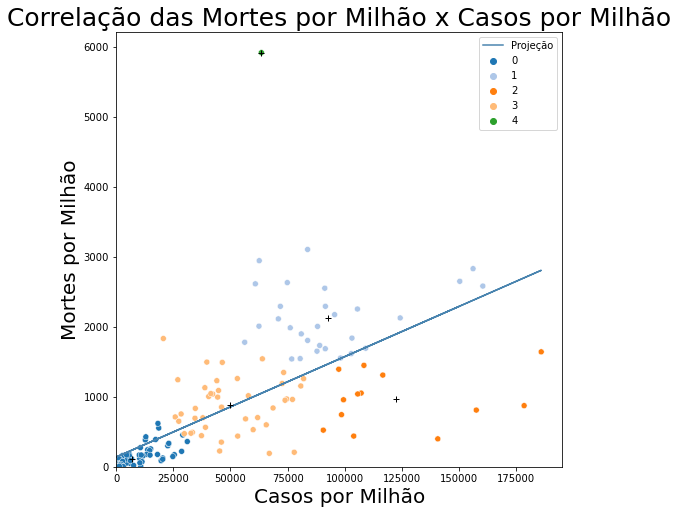

In [49]:
fig, ax0 = plt.subplots()
fig.set_size_inches(8,8)
sns.scatterplot(y='MORTES_POR_MILHAO', x='CASOS_POR_MILHAO', data=dfClass, palette='tab20', ax=ax0, hue='GRUPO')
ax0.set_title('Correlação das Mortes por Milhão x Casos por Milhão', fontsize=25)
ax0.set_xlabel('Casos por Milhão', fontsize=20)
ax0.set_ylabel('Mortes por Milhão', fontsize=20)
ax0.set_xlim(0, max(dfClass.CASOS_POR_MILHAO) * 1.05)
ax0.set_ylim(0, max(dfClass.MORTES_POR_MILHAO) * 1.05)


df.index = range(df.shape[0])
_, resultados = linha_tendencia(df.CASOS_POR_MILHAO, df.MORTES_POR_MILHAO)
sns.lineplot(x = df.CASOS_POR_MILHAO, y=resultados, color='#4984af', markers=True, sort=False, label="Projeção", ax=ax0)




for i in clusters:
    ax0.plot(i[0], i[1], 'k+')

In [50]:
dfClass.GRUPO.value_counts(normalize=True, sort=False)

0    0.527473
1    0.159341
2    0.071429
3    0.236264
4    0.005495
Name: GRUPO, dtype: float64

In [51]:
dfRegiao = pd.DataFrame(dfClass.SUB_REGIAO.value_counts())

for i in range(NUMERO_GRUPOS) :
    dfGrupo = pd.DataFrame(dfClass.query(f'GRUPO=={i}').SUB_REGIAO.value_counts())
    dfRegiao = dfRegiao.merge(dfGrupo, how='outer', left_index=True, right_index=True)

columns_names = ['TOTAL']
columns_grupos = []
for i in range(NUMERO_GRUPOS) :
    columns_names.append(f'GRUPO_{i}')    
    columns_grupos.append(f'GRUPO_{i}')    
dfRegiao.columns = columns_names    
    
for i in range(NUMERO_GRUPOS) :
    dfRegiao[f'GRUPO_{i}%'] = ((dfRegiao[f'GRUPO_{i}'] / dfRegiao.TOTAL) * 100).round(2)
    

    
dfRegiao.drop(labels=columns_grupos, axis='columns', inplace=True)
dfRegiao.fillna(0, inplace=True)
dfRegiao

,TOTAL,GRUPO_0%,GRUPO_1%,GRUPO_2%,GRUPO_3%,GRUPO_4%
AUSTRALIA AND NEW ZEALAND,2,100.00,0.00,0.00,0.00,0.00
CARIBBEAN,12,75.00,0.00,0.00,25.00,0.00
CENTRAL AMERICA,8,37.50,12.50,0.00,50.00,0.00
CENTRAL ASIA,4,100.00,0.00,0.00,0.00,0.00
EASTERN AFRICA,18,94.44,0.00,5.56,0.00,0.00
EASTERN ASIA,4,75.00,0.00,0.00,25.00,0.00
EASTERN EUROPE,10,0.00,60.00,0.00,40.00,0.00
MELANESIA,3,100.00,0.00,0.00,0.00,0.00
MIDDLE AFRICA,9,100.00,0.00,0.00,0.00,0.00
NORTHERN AFRICA,6,66.67,0.00,0.00,33.33,0.00


In [52]:
dfRegiao = pd.DataFrame(dfClass.CONTINENTE.value_counts())

for i in range(NUMERO_GRUPOS) :
    dfGrupo = pd.DataFrame(dfClass.query(f'GRUPO=={i}').CONTINENTE.value_counts())
    dfRegiao = dfRegiao.merge(dfGrupo, how='outer', left_index=True, right_index=True)

columns_names = ['TOTAL']
columns_grupos = []
for i in range(NUMERO_GRUPOS) :
    columns_names.append(f'GRUPO_{i}')    
    columns_grupos.append(f'GRUPO_{i}')    
dfRegiao.columns = columns_names    
    
for i in range(NUMERO_GRUPOS) :
    dfRegiao[f'GRUPO_{i}%'] = ((dfRegiao[f'GRUPO_{i}'] / dfRegiao.TOTAL) * 100).round(2)
    

    
dfRegiao.drop(labels=columns_grupos, axis='columns', inplace=True)
dfRegiao.fillna(0, inplace=True)
dfRegiao

,TOTAL,GRUPO_0%,GRUPO_1%,GRUPO_2%,GRUPO_3%,GRUPO_4%
AFRICA,54,87.04,0.00,1.85,11.11,0.00
AMERICA DO NORTE,2,0.00,50.00,0.00,50.00,0.00
AMERICA LATINA,32,40.62,21.88,0.00,34.38,3.12
ASIA,46,60.87,2.17,13.04,23.91,0.00
EUROPA,43,6.98,46.51,13.95,32.56,0.00
OCEANIA,5,100.00,0.00,0.00,0.00,0.00
